In [78]:
import pandas as pd
import numpy as np


#Visualization
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

#Model
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
data = pd.read_csv("marketing_campaign.csv", sep = "\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# EDA

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [82]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [83]:
data.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [84]:
data.sort_values(by='ID')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0
822,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,0,3,11,1
1511,9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,3,11,0
1654,13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,3,11,0
1906,17,1971,PhD,Married,60491.0,0,1,06-09-2013,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,11178,1972,Master,Single,42394.0,1,0,23-03-2014,69,15,2,10,0,1,4,1,1,0,3,7,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
2183,11187,1978,Basic,Single,26487.0,1,0,20-05-2013,23,2,8,10,12,14,23,3,2,1,3,5,0,0,0,0,0,0,3,11,0
997,11188,1957,Graduation,Together,26091.0,1,1,25-02-2014,84,15,10,19,8,17,20,3,2,1,3,5,0,0,0,0,0,0,3,11,0


In [85]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [86]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [87]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [88]:
data_drop = data.drop(columns=['ID', 'Dt_Customer', 'Complain', 'Z_CostContact', 'Z_Revenue'])
data_drop

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0


In [89]:
data_drop.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response'],
      dtype='object')

# Visualization

In [90]:
# Calculer la répartition des statuts matrimoniaux
marital_status_counts = data['Marital_Status'].value_counts().reset_index()
marital_status_counts.columns = ['Marital_Status', 'Count']

couleurs = ['#95A398']
# Créer un graphique en barres avec plotly
fig = px.bar(marital_status_counts, x='Marital_Status', y='Count', 
             title='Répartition des statuts matrimoniaux', 
             labels={'Marital_Status': 'Statut matrimonial', 'Count': 'Nombre de personnes'},
             color_discrete_sequence=couleurs)

# Afficher le graphique
fig.show()

In [91]:
# Calculer la répartition des statuts matrimoniaux
Education_counts = data['Education'].value_counts().reset_index()
Education_counts.columns = ['Education', 'Count']

couleurs = ['#95A398']

# Créer un graphique en barres avec plotly
fig = px.bar(Education_counts, x='Education', y='Count', 
             title='Répartition de Education', 
             labels={'Education': 'Education', 'Count': 'Nombre de personnes'},
             color_discrete_sequence=couleurs)

# Afficher le graphique
fig.show()

In [92]:
couleurs = ['#95A398']

fig = px.histogram(data, x='Income', nbins=20, title='Distribution des revenus',
                  color_discrete_sequence=couleurs)
fig.show()

In [93]:
couleurs = ['#95A398']


fig = px.box(data, x='Education', y='Income', title='Revenus par niveau d\'éducation',
             color_discrete_sequence=couleurs)
fig.show()

In [94]:
fig = px.box(data, x='Marital_Status', y='MntWines', title='Dépenses en vin par statut matrimonial',
             color_discrete_sequence=couleurs)
fig.show()

In [95]:
fig = px.bar(data, x='Marital_Status', y='NumWebPurchases', title='Nombre d\'achats en ligne par statut matrimonial', 
             labels={'NumWebPurchases': 'Nombre d\'achats en ligne'},
             color_discrete_sequence=couleurs)
fig.show()

In [96]:
fig = px.scatter(data, x='Income', y='MntWines', title='Revenus vs Dépenses en vin',
                 color_discrete_sequence=couleurs)
fig.show()

In [97]:
corr_matrix = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
fig = ff.create_annotated_heatmap(z=corr_matrix.values, 
                                  x=list(corr_matrix.columns), 
                                  y=list(corr_matrix.index), 
                                  annotation_text=corr_matrix.round(2).values, 
                                  colorscale='Viridis')
fig.update_layout(title='Corrélation entre les différentes variables de dépense')
fig.show()

In [98]:
total_spent = {
    'Vins': data['MntWines'].sum(),
    'Fruits': data['MntFruits'].sum(),
    'Produits Carnés': data['MntMeatProducts'].sum(),
    'Produits de la Mer': data['MntFishProducts'].sum(),
    'Produits Sucrés': data['MntSweetProducts'].sum()
}

# Convertir en DataFrame pour plotly
total_spent_df = pd.DataFrame(list(total_spent.items()), columns=['Catégorie', 'Montant Total'])

# Créer un graphique en barres avec plotly
fig = px.bar(total_spent_df, x='Catégorie', y='Montant Total',
             title='Montant total dépensé par catégorie de produit',
             labels={'Montant Total': 'Montant Total (en unités monétaires)', 'Catégorie': 'Catégorie de Produit'},
             color_discrete_sequence=couleurs)

# Afficher le graphique
fig.show()

In [99]:
total_purchases = {
    'Promotions': data['NumDealsPurchases'].sum(),
    'Site Web': data['NumWebPurchases'].sum(),
    'Catalogues': data['NumCatalogPurchases'].sum(),
    'Magasins': data['NumStorePurchases'].sum()
}

# Convertir en DataFrame pour plotly
total_purchases_df = pd.DataFrame(list(total_purchases.items()), columns=['Canal de Vente', 'Nombre Total d\'Achats'])

# Créer un graphique en barres avec plotly
fig = px.bar(total_purchases_df, x='Canal de Vente', y='Nombre Total d\'Achats',
             title='Répartition des ventes par canal de vente',
             labels={'Nombre Total d\'Achats': 'Nombre Total d\'Achats', 'Canal de Vente': 'Canal de Vente'},
            color_discrete_sequence=couleurs)

# Afficher le graphique
fig.show()

In [100]:
data_drop['Has_Children'] = data_drop.apply(lambda row: 'Yes' if row['Kidhome'] + row['Teenhome'] > 0 else 'No', axis=1)

products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_long = data_drop.melt(id_vars=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 
                           'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                           'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
                           'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Has_Children'],
                  value_vars=products,
                  var_name='Product',
                  value_name='Amount')

# Filtrage des lignes où le montant est supérieur à 0
df_long = df_long[df_long['Amount'] > 0]

# Filtrage des campagnes acceptées et création d'une colonne de campagne
df_long['Campaign'] = df_long.apply(lambda row: 'Campaign 3' if row['AcceptedCmp3'] == 1 else 
                                    ('Campaign 4' if row['AcceptedCmp4'] == 1 else 
                                     ('Campaign 5' if row['AcceptedCmp5'] == 1 else 
                                      ('Campaign 1' if row['AcceptedCmp1'] == 1 else 
                                       ('Campaign 2' if row['AcceptedCmp2'] == 1 else 'None')))), axis=1)

# Garder uniquement les lignes avec une campagne acceptée
df_long = df_long[df_long['Campaign'] != 'None']

# Groupement des données pour le graphique
grouped_counts = df_long.groupby(['Campaign', 'Product', 'Marital_Status', 'Has_Children']).size().reset_index(name='Count')

# Création du graphique Sunburst
fig = px.sunburst(grouped_counts, 
                  path=['Campaign', 'Product', 'Marital_Status', 'Has_Children'], 
                  values='Count', 
                  title='Produits vendus par campagne, statut marital et présence d\'enfants',
                  color='Has_Children',
                  color_discrete_map={'Yes': '#D58490', 'No': '#048B9A'},
                  width=800, 
                  height=800
                 )

fig.show()

In [101]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_long = data_drop.melt(id_vars=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'],
                  value_vars=products,
                  var_name='Product',
                  value_name='Amount')

# Filtrage des lignes où le montant est supérieur à 0
df_long = df_long[df_long['Amount'] > 0]

# Création d'une colonne de campagne
df_long['Campaign'] = df_long.apply(lambda row: 'Campaign 3' if row['AcceptedCmp3'] == 1 else 
                                    ('Campaign 4' if row['AcceptedCmp4'] == 1 else 
                                     ('Campaign 5' if row['AcceptedCmp5'] == 1 else 
                                      ('Campaign 1' if row['AcceptedCmp1'] == 1 else 
                                       ('Campaign 2' if row['AcceptedCmp2'] == 1 else 'None')))), axis=1)

# Garder uniquement les lignes avec une campagne acceptée
df_long = df_long[df_long['Campaign'] != 'None']

# Groupement des données pour le graphique
grouped_counts = df_long.groupby(['Campaign', 'Product']).size().reset_index(name='Count')

color_map = {
    'MntWines': '#95A398',      
    'MntFruits': '#B0BDB3',     
    'MntMeatProducts': '#7B897E',
    'MntFishProducts': '#A5B3A8',
    'MntSweetProducts': '#859E88',
    'MntGoldProds': '#95B3A8',
}

# Création du graphique Sunburst avec des couleurs personnalisées
fig = px.sunburst(grouped_counts, 
                  path=['Campaign', 'Product'], 
                  values='Count', 
                  title='Répartition des ventes de produits en fonction des campagnes',
                  color='Product',
                  color_discrete_map=color_map,
                  width=800, 
                  height=800
                 )

fig.show()

In [102]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Transformation des données pour un format long
df_long = data_drop.melt(id_vars=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
                         value_vars=products,
                         var_name='Product',
                         value_name='Amount')

# Filtrage des lignes où le montant est supérieur à 0
df_long = df_long[df_long['Amount'] > 0]

# Création d'une colonne de campagne
df_long['Campaign'] = df_long.apply(lambda row: 'Campaign 3' if row['AcceptedCmp3'] == 1 else 
                                    ('Campaign 4' if row['AcceptedCmp4'] == 1 else 
                                     ('Campaign 5' if row['AcceptedCmp5'] == 1 else 
                                      ('Campaign 1' if row['AcceptedCmp1'] == 1 else 
                                       ('Campaign 2' if row['AcceptedCmp2'] == 1 else 'None')))), axis=1)

# Garder uniquement les lignes avec une campagne acceptée
df_long = df_long[df_long['Campaign'] != 'None']

# Création d'une colonne pour le canal de vente
def determine_channel(row):
    if row['NumWebPurchases'] > 0:
        return 'Web'
    elif row['NumCatalogPurchases'] > 0:
        return 'Catalog'
    elif row['NumStorePurchases'] > 0:
        return 'Store'
    else:
        return 'Unknown'

df_long['Channel'] = df_long.apply(determine_channel, axis=1)

# Groupement des données pour le graphique
grouped_counts = df_long.groupby(['Campaign', 'Channel', 'Product']).size().reset_index(name='Count')

# Définition des couleurs personnalisées pour chaque produit
color_map = {
    'MntWines': '#95A398',      
    'MntFruits': '#B0BDB3',     
    'MntMeatProducts': '#7B897E',
    'MntFishProducts': '#A5B3A8',
    'MntSweetProducts': '#859E88',
    'MntGoldProds': '#95B3A8',
    'Web': '#1f77b4',          # Blue
    'Catalog': '#ff7f0e',      # Orange
    'Store': '#2ca02c',        # Green
}

# Création du graphique Sunburst avec des couleurs personnalisées
fig = px.sunburst(grouped_counts, 
                  path=['Campaign', 'Channel', 'Product'], 
                  values='Count', 
                  title='Répartition des ventes de produits en fonction des campagnes et des canaux de vente',
                  color='Product',
                  color_discrete_map=color_map,
                  width=800, 
                  height=800
                 )

fig.show()

# RFM

In [103]:
data_drop.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Has_Children'],
      dtype='object')

## Segementation

In [104]:
# Segmentation basée sur la Démographie
demographic_segments = data_drop.groupby(['Education', 'Marital_Status']).size()
print("Segmentation basée sur la Démographie :")
demographic_segments

Segmentation basée sur la Démographie :


Education   Marital_Status
2n Cycle    Divorced           23
            Married            81
            Single             37
            Together           57
            Widow               5
Basic       Divorced            1
            Married            20
            Single             18
            Together           14
            Widow               1
Graduation  Absurd              1
            Alone               1
            Divorced          119
            Married           433
            Single            252
            Together          286
            Widow              35
Master      Absurd              1
            Alone               1
            Divorced           37
            Married           138
            Single             75
            Together          106
            Widow              12
PhD         Alone               1
            Divorced           52
            Married           192
            Single             98
            Together 

In [105]:
# Segmentation basée sur le Comportement d'Achat
purchase_segments = data_drop.groupby(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']).size()
print("\nSegmentation basée sur le Comportement d'Achat :")
purchase_segments


Segmentation basée sur le Comportement d'Achat :


NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases
0                  0                0                    0                    4
                                                         1                    3
                                    28                   0                    1
                   1                0                    0                    1
                                                         1                    2
                                                                             ..
15                 0                1                    0                    1
                                    22                   0                    1
                                    28                   0                    1
                                                         1                    1
                   9                6                    9                    1
Length: 1057, dtype: int64

In [106]:
# Segmentation basée sur la Composition du Ménage
household_segments = data_drop.groupby('Has_Children').size()
print("\nSegmentation basée sur la Composition du Ménage :")
household_segments


Segmentation basée sur la Composition du Ménage :


Has_Children
No      638
Yes    1602
dtype: int64

## RFM

In [107]:
# Calcul de la fréquence (Frequency) en comptant le nombre total d'achats
data_drop['Frequency'] = data_drop[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Calcul de la valeur monétaire (Monetary) en summant les montants dépensés
data_drop['Monetary'] = data_drop[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Attribution des scores RFM en classant les clients en quartiles
rfm_quantiles = data_drop[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75])
def rfm_score(x, c):
    if x <= rfm_quantiles[c][0.25]:
        return 4
    elif x <= rfm_quantiles[c][0.50]:
        return 3
    elif x <= rfm_quantiles[c][0.75]:
        return 2
    else:
        return 1

data_drop['R'] = data_drop['Recency'].apply(rfm_score, args=('Recency',))
data_drop['F'] = data_drop['Frequency'].apply(rfm_score, args=('Frequency',))
data_drop['M'] = data_drop['Monetary'].apply(rfm_score, args=('Monetary',))

# Calcul du score RFM
data_drop['RFM_Score'] = data_drop['R'] * 100 + data_drop['F'] * 10 + data_drop['M']

# Affichage des résultats
print(data_drop[['Recency', 'Frequency', 'Monetary', 'RFM_Score']])

      Recency  Frequency  Monetary  RFM_Score
0          58         25      1617        211
1          38          6        27        344
2          26         21       776        322
3          26          8        53        344
4          94         19       422        122
...       ...        ...       ...        ...
2235       46         18      1341        321
2236       56         22       444        212
2237       91         19      1241        121
2238        8         23       843        412
2239       40         11       172        333

[2240 rows x 4 columns]


In [108]:
rfm_distribution = data_drop['RFM_Score'].value_counts().sort_index()
print(rfm_distribution)

111     79
112     50
121     56
122     53
123     12
131      5
132     18
133     89
134     20
143     40
144    129
211     65
212     65
221     75
222     79
223     23
231      8
232     19
233     71
234     14
241      1
243     44
244    103
311     71
312     59
321     60
322     61
323     15
331      8
332     11
333     85
334     18
343     30
344    137
411     51
412     70
413      2
421     71
422     63
423     18
431     10
432     11
433     95
434     10
443     37
444    129
Name: RFM_Score, dtype: int64


In [109]:
segments = {
    5: "Segment 5 - Meilleurs Clients",
    4: "Segment 4",
    3: "Segment 3",
    2: "Segment 2",
    1: "Segment 1 - Clients à Réactiver"
}

# Attribuer des segments aux clients en fonction de leur score RFM
def assign_segment(score):
    if score >= 400:
        return segments[5]
    elif score >= 300:
        return segments[4]
    elif score >= 200:
        return segments[3]
    elif score >= 100:
        return segments[2]
    else:
        return segments[1]

data_drop['Segment'] = data_drop['RFM_Score'].apply(assign_segment)

# Analyser les segments
segment_counts = data_drop['Segment'].value_counts()
print("Répartition des segments :")
print(segment_counts)

# Afficher les résultats
print(data_drop[['RFM_Score', 'Segment']])

Répartition des segments :
Segment 3                        567
Segment 5 - Meilleurs Clients    567
Segment 4                        555
Segment 2                        551
Name: Segment, dtype: int64
      RFM_Score                        Segment
0           211                      Segment 3
1           344                      Segment 4
2           322                      Segment 4
3           344                      Segment 4
4           122                      Segment 2
...         ...                            ...
2235        321                      Segment 4
2236        212                      Segment 3
2237        121                      Segment 2
2238        412  Segment 5 - Meilleurs Clients
2239        333                      Segment 4

[2240 rows x 2 columns]


/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

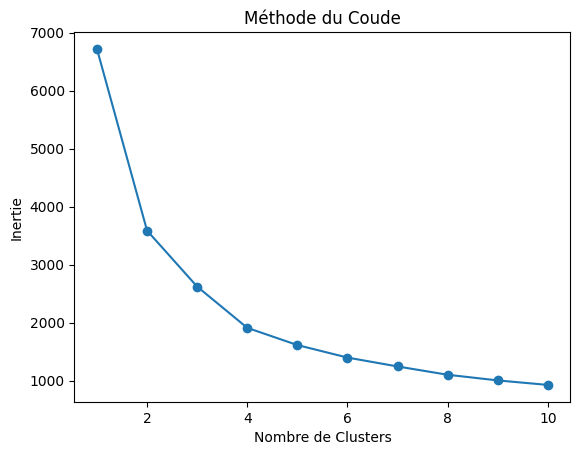

Répartition des segments :
2    613
1    582
3    548
0    497
Name: Segment, dtype: int64
      Recency  Frequency  Monetary  Segment
0          58         25      1617        3
1          38          6        27        2
2          26         21       776        0
3          26          8        53        2
4          94         19       422        3
...       ...        ...       ...      ...
2235       46         18      1341        0
2236       56         22       444        3
2237       91         19      1241        3
2238        8         23       843        0
2239       40         11       172        2

[2240 rows x 4 columns]


/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [110]:
X = data_drop[['Recency', 'Frequency', 'Monetary']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choisir le nombre optimal de clusters en utilisant la méthode du coude
# Pour cela, nous allons entraîner plusieurs modèles K-means avec différents nombres de clusters
# et calculer l'inertie (somme des carrés des distances des échantillons aux centres de leur cluster le plus proche)
# pour chaque modèle. Ensuite, nous tracersons la courbe d'inertie en fonction du nombre de clusters pour trouver
# le coude dans le graphique, c'est-à-dire le point où l'augmentation de l'inertie commence à ralentir.
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe d'inertie
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude')
plt.show()

# Basé sur la courbe d'inertie, choisissez le nombre optimal de clusters et entraînez le modèle K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Attribuer les segments aux clients
data_drop['Segment'] = kmeans.labels_

# Analyser les segments
segment_counts = data_drop['Segment'].value_counts()
print("Répartition des segments :")
print(segment_counts)

# Afficher les résultats
print(data_drop[['Recency', 'Frequency', 'Monetary', 'Segment']])

# Cohorte

In [111]:
data_drop

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Has_Children,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,No,25,1617,2,1,1,211,3
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,Yes,6,27,3,4,4,344,2
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,No,21,776,3,2,2,322,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,Yes,8,53,3,4,4,344,2
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,Yes,19,422,1,2,2,122,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,Yes,18,1341,3,2,1,321,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,Yes,22,444,2,1,2,212,3
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,No,19,1241,1,2,1,121,3
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,Yes,23,843,4,1,2,412,0


In [112]:
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 365]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330', '331-365']
data_drop['RecencyCohort'] = pd.cut(data_drop['Recency'], bins=bins, labels=labels, right=False)

# Sélectionner les colonnes pertinentes pour le taux de réponse
response_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Fusionner les colonnes de réponse en une seule colonne 'Response'
data_drop['Response'] = data_drop[response_columns].sum(axis=1)

# Créer la matrice de cohorte en utilisant un pivot table
cohort_data = data_drop.pivot_table(index='RecencyCohort', columns='Response', aggfunc='size')

# Remplir les valeurs manquantes par 0 pour simplifier l'analyse
cohort_data = cohort_data.fillna(0)

# Afficher les résultats
cohort_data

Response,0,1,2,3,4
RecencyCohort,,,,,
0-30,541,105,31,10,5
31-60,534,95,20,14,1
61-90,528,94,24,16,4
91-120,174,31,8,4,1
121-150,0,0,0,0,0
151-180,0,0,0,0,0
181-210,0,0,0,0,0
211-240,0,0,0,0,0
241-270,0,0,0,0,0


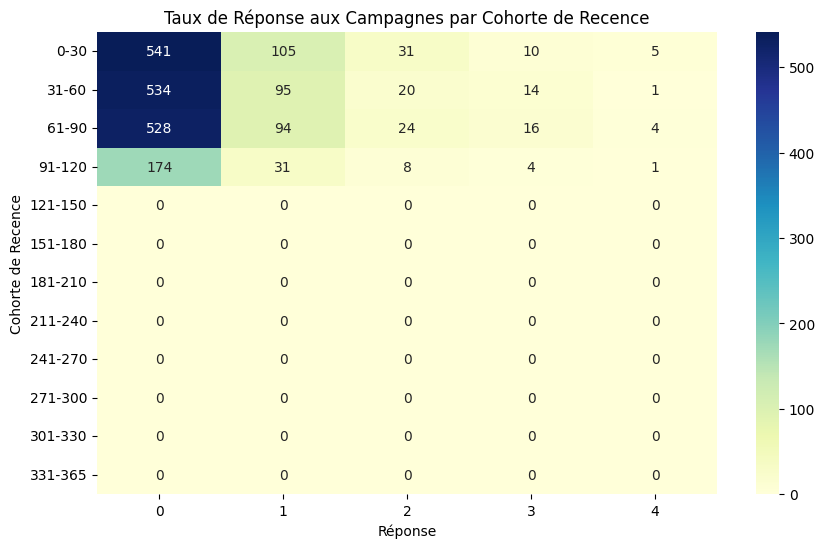

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Taux de Réponse aux Campagnes par Cohorte de Recence')
plt.xlabel('Réponse')
plt.ylabel('Cohorte de Recence')
plt.show()

In [114]:
# Segmentation basée sur la Récence
recency_segments = data_drop.groupby('RecencyCohort').size()
print("\nSegmentation basée sur la Récence :")
recency_segments


Segmentation basée sur la Récence :


RecencyCohort
0-30       692
31-60      664
61-90      666
91-120     218
121-150      0
151-180      0
181-210      0
211-240      0
241-270      0
271-300      0
301-330      0
331-365      0
dtype: int64

# Modification dataframe

In [115]:
values_to_remove = ['Alone', 'Absurd', 'YOLO']
data_drop = data_drop[~data_drop['Marital_Status'].isin(values_to_remove)]

In [116]:
data_drop.loc[(data_drop['Marital_Status'] == 'Divorced') & (data_drop['Kidhome'] == 0) & (data_drop['Teenhome'] == 0), 'Marital_Status'] = 'Single'
data_drop

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Has_Children,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,No,25,1617,2,1,1,211,3,31-60
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,Yes,6,27,3,4,4,344,2,31-60
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,No,21,776,3,2,2,322,0,0-30
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,Yes,8,53,3,4,4,344,2,0-30
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,Yes,19,422,1,2,2,122,3,91-120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,Yes,18,1341,3,2,1,321,0,31-60
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,1,Yes,22,444,2,1,2,212,3,31-60
2237,1981,Graduation,Single,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,1,No,19,1241,1,2,1,121,3,91-120
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,Yes,23,843,4,1,2,412,0,0-30


In [117]:
# Mapping des valeurs
education_mapping = {'Graduation': 1, 'PhD': 2, 'Master': 3, 'Basic': 4, '2n Cycle': 5}

# Appliquer le mapping à la colonne 'Education'
data_drop['Education'] = data_drop['Education'].map(education_mapping)

# Remplacer les valeurs non trouvées par NaN
data_drop['Education'] = data_drop['Education'].fillna(float('nan'))

data_drop

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Has_Children,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort
0,1957,1,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,No,25,1617,2,1,1,211,3,31-60
1,1954,1,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,Yes,6,27,3,4,4,344,2,31-60
2,1965,1,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,No,21,776,3,2,2,322,0,0-30
3,1984,1,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,Yes,8,53,3,4,4,344,2,0-30
4,1981,2,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,Yes,19,422,1,2,2,122,3,91-120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,Yes,18,1341,3,2,1,321,0,31-60
2236,1946,2,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,1,Yes,22,444,2,1,2,212,3,31-60
2237,1981,1,Single,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,1,No,19,1241,1,2,1,121,3,91-120
2238,1956,3,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,Yes,23,843,4,1,2,412,0,0-30


In [118]:
data_propre = data_drop.drop(columns=['Kidhome', 'Teenhome'])
data_propre

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Has_Children,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort
0,1957,1,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,No,25,1617,2,1,1,211,3,31-60
1,1954,1,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,Yes,6,27,3,4,4,344,2,31-60
2,1965,1,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,No,21,776,3,2,2,322,0,0-30
3,1984,1,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,Yes,8,53,3,4,4,344,2,0-30
4,1981,2,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,Yes,19,422,1,2,2,122,3,91-120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,Married,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,Yes,18,1341,3,2,1,321,0,31-60
2236,1946,2,Together,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,1,Yes,22,444,2,1,2,212,3,31-60
2237,1981,1,Single,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,1,No,19,1241,1,2,1,121,3,91-120
2238,1956,3,Together,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,Yes,23,843,4,1,2,412,0,0-30


In [119]:
data_propre.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Has_Children', 'Frequency',
       'Monetary', 'R', 'F', 'M', 'RFM_Score', 'Segment', 'RecencyCohort'],
      dtype='object')

In [120]:
current_year = pd.Timestamp.now().year
data_propre['Age'] = current_year - data_propre['Year_Birth']
data_propre

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Has_Children,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort,Age
0,1957,1,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,No,25,1617,2,1,1,211,3,31-60,67
1,1954,1,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,Yes,6,27,3,4,4,344,2,31-60,70
2,1965,1,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,No,21,776,3,2,2,322,0,0-30,59
3,1984,1,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,Yes,8,53,3,4,4,344,2,0-30,40
4,1981,2,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,Yes,19,422,1,2,2,122,3,91-120,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,Married,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,Yes,18,1341,3,2,1,321,0,31-60,57
2236,1946,2,Together,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,1,Yes,22,444,2,1,2,212,3,31-60,78
2237,1981,1,Single,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,1,No,19,1241,1,2,1,121,3,91-120,43
2238,1956,3,Together,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,Yes,23,843,4,1,2,412,0,0-30,68


In [121]:
def get_accepted_campaigns(row):
    campaigns = []
    if row['AcceptedCmp3'] == 1:
        campaigns.append('AcceptedCmp3')
    if row['AcceptedCmp4'] == 1:
        campaigns.append('AcceptedCmp4')
    if row['AcceptedCmp5'] == 1:
        campaigns.append('AcceptedCmp5')
    if row['AcceptedCmp1'] == 1:
        campaigns.append('AcceptedCmp1')
    if row['AcceptedCmp2'] == 1:
        campaigns.append('AcceptedCmp2')
    return ', '.join(campaigns) if campaigns else 'None'

In [122]:
data_propre['Accepted_Campaigns'] = data_propre.apply(get_accepted_campaigns, axis=1)
data_propre

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Has_Children,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort,Age,Accepted_Campaigns
0,1957,1,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,No,25,1617,2,1,1,211,3,31-60,67,None
1,1954,1,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,Yes,6,27,3,4,4,344,2,31-60,70,None
2,1965,1,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,No,21,776,3,2,2,322,0,0-30,59,None
3,1984,1,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,Yes,8,53,3,4,4,344,2,0-30,40,None
4,1981,2,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,Yes,19,422,1,2,2,122,3,91-120,43,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,1,Married,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,Yes,18,1341,3,2,1,321,0,31-60,57,None
2236,1946,2,Together,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,1,Yes,22,444,2,1,2,212,3,31-60,78,AcceptedCmp1
2237,1981,1,Single,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,1,No,19,1241,1,2,1,121,3,91-120,43,AcceptedCmp4
2238,1956,3,Together,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,Yes,23,843,4,1,2,412,0,0-30,68,None


In [123]:
data_propre.drop(columns=['Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'], inplace=True)
data_propre

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Has_Children,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort,Age,Accepted_Campaigns
0,1,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,No,25,1617,2,1,1,211,3,31-60,67,None
1,1,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,Yes,6,27,3,4,4,344,2,31-60,70,None
2,1,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,No,21,776,3,2,2,322,0,0-30,59,None
3,1,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,Yes,8,53,3,4,4,344,2,0-30,40,None
4,2,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,Yes,19,422,1,2,2,122,3,91-120,43,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,Married,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,Yes,18,1341,3,2,1,321,0,31-60,57,None
2236,2,Together,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,Yes,22,444,2,1,2,212,3,31-60,78,AcceptedCmp1
2237,1,Single,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,No,19,1241,1,2,1,121,3,91-120,43,AcceptedCmp4
2238,3,Together,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,Yes,23,843,4,1,2,412,0,0-30,68,None


In [124]:
data_propre.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Has_Children', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Score',
       'Segment', 'RecencyCohort', 'Age', 'Accepted_Campaigns'],
      dtype='object')

In [125]:
columns = [
    'Age', 'Education', 'Marital_Status', 'Has_Children',
    'Income', 'Accepted_Campaigns',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 'MntWines', 'MntFruits', 
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Score',
    'Segment', 'RecencyCohort'
]

data_propre = data_propre[columns]

data_propre

,Age,Education,Marital_Status,Has_Children,Income,Accepted_Campaigns,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort
0,67,1,Single,No,58138.0,None,3,8,10,4,7,635,88,546,172,88,88,58,25,1617,2,1,1,211,3,31-60
1,70,1,Single,Yes,46344.0,None,2,1,1,2,5,11,1,6,2,1,6,38,6,27,3,4,4,344,2,31-60
2,59,1,Together,No,71613.0,None,1,8,2,10,4,426,49,127,111,21,42,26,21,776,3,2,2,322,0,0-30
3,40,1,Together,Yes,26646.0,None,2,2,0,4,6,11,4,20,10,3,5,26,8,53,3,4,4,344,2,0-30
4,43,2,Married,Yes,58293.0,None,5,5,3,6,5,173,43,118,46,27,15,94,19,422,1,2,2,122,3,91-120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,1,Married,Yes,61223.0,None,2,9,3,4,5,709,43,182,42,118,247,46,18,1341,3,2,1,321,0,31-60
2236,78,2,Together,Yes,64014.0,AcceptedCmp1,7,8,2,5,7,406,0,30,0,0,8,56,22,444,2,1,2,212,3,31-60
2237,43,1,Single,No,56981.0,AcceptedCmp4,1,2,3,13,6,908,48,217,32,12,24,91,19,1241,1,2,1,121,3,91-120
2238,68,3,Together,Yes,69245.0,None,2,6,5,10,3,428,30,214,80,30,61,8,23,843,4,1,2,412,0,0-30


In [126]:
couleur = '#95a398'

# Créer les tranches d'âge et les convertir en chaînes de caractères
data_propre['Age_Group'] = pd.cut(data_propre['Age'], bins=range(0, 101, 10), right=False).astype(str)

# Compter le nombre de clients dans chaque tranche d'âge
age_distribution = data_propre['Age_Group'].value_counts().reset_index()
age_distribution.columns = ['Age_Group', 'Count']

# Trier les tranches d'âge par ordre croissant
age_distribution = age_distribution.sort_values(by='Age_Group')

# Créer le graphique avec la couleur personnalisée
fig = px.bar(age_distribution, x='Age_Group', y='Count', title='Répartition des âges par tranche de 10 ans', color_discrete_sequence=[couleur])
fig.update_xaxes(categoryorder='array', categoryarray=age_distribution['Age_Group'])  # Pour conserver l'ordre des tranches d'âge
fig.show()

In [127]:
data_propre.columns

Index(['Age', 'Education', 'Marital_Status', 'Has_Children', 'Income',
       'Accepted_Campaigns', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'Recency', 'Frequency', 'Monetary',
       'R', 'F', 'M', 'RFM_Score', 'Segment', 'RecencyCohort', 'Age_Group'],
      dtype='object')

In [128]:
# Calculer le nombre de clients réceptifs et non réceptifs aux campagnes marketing
receptif_count = (data_propre['Accepted_Campaigns'] == 'None').sum()
non_receptif_count = len(data_propre) - receptif_count

# Calculer les pourcentages
total_clients = len(data_propre)
receptif_percentage = (receptif_count / total_clients) * 100
non_receptif_percentage = (non_receptif_count / total_clients) * 100

# Créer un DataFrame pour la visualisation
data = {
    'Receptivité': ['Réceptif', 'Non Réceptif'],
    'Pourcentage': [receptif_percentage, non_receptif_percentage]
}
df_percentage = pd.DataFrame(data)

colors = {'Réceptif': '#95a398', 'Non Réceptif': '#3c3730'}  # Par exemple, bleu et orange

# Créer le graphique avec les couleurs personnalisées
fig = px.pie(df_percentage, values='Pourcentage', names='Receptivité', title='Répartition des clients par réceptivité aux campagnes marketing', color='Receptivité', color_discrete_map=colors)
fig.show()

# Modeling

In [129]:
data_propre.columns

Index(['Age', 'Education', 'Marital_Status', 'Has_Children', 'Income',
       'Accepted_Campaigns', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'Recency', 'Frequency', 'Monetary',
       'R', 'F', 'M', 'RFM_Score', 'Segment', 'RecencyCohort', 'Age_Group'],
      dtype='object')

## Encodage

In [130]:
data_encoded = data_propre
data_encoded['Has_Children'] = data_propre['Has_Children'].map({'Yes': 1, 'No': 0})
data_encoded

,Age,Education,Marital_Status,Has_Children,Income,Accepted_Campaigns,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort,Age_Group
0,67,1,Single,0,58138.0,None,3,8,10,4,7,635,88,546,172,88,88,58,25,1617,2,1,1,211,3,31-60,"[60, 70)"
1,70,1,Single,1,46344.0,None,2,1,1,2,5,11,1,6,2,1,6,38,6,27,3,4,4,344,2,31-60,"[70, 80)"
2,59,1,Together,0,71613.0,None,1,8,2,10,4,426,49,127,111,21,42,26,21,776,3,2,2,322,0,0-30,"[50, 60)"
3,40,1,Together,1,26646.0,None,2,2,0,4,6,11,4,20,10,3,5,26,8,53,3,4,4,344,2,0-30,"[40, 50)"
4,43,2,Married,1,58293.0,None,5,5,3,6,5,173,43,118,46,27,15,94,19,422,1,2,2,122,3,91-120,"[40, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,1,Married,1,61223.0,None,2,9,3,4,5,709,43,182,42,118,247,46,18,1341,3,2,1,321,0,31-60,"[50, 60)"
2236,78,2,Together,1,64014.0,AcceptedCmp1,7,8,2,5,7,406,0,30,0,0,8,56,22,444,2,1,2,212,3,31-60,"[70, 80)"
2237,43,1,Single,0,56981.0,AcceptedCmp4,1,2,3,13,6,908,48,217,32,12,24,91,19,1241,1,2,1,121,3,91-120,"[40, 50)"
2238,68,3,Together,1,69245.0,None,2,6,5,10,3,428,30,214,80,30,61,8,23,843,4,1,2,412,0,0-30,"[60, 70)"


In [131]:
data_encoded['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [132]:
data_encoded['Marital_Status'] = data_propre['Marital_Status'].map({'Single': 0, 'Together': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4})
data_encoded

,Age,Education,Marital_Status,Has_Children,Income,Accepted_Campaigns,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort,Age_Group
0,67,1,0,0,58138.0,None,3,8,10,4,7,635,88,546,172,88,88,58,25,1617,2,1,1,211,3,31-60,"[60, 70)"
1,70,1,0,1,46344.0,None,2,1,1,2,5,11,1,6,2,1,6,38,6,27,3,4,4,344,2,31-60,"[70, 80)"
2,59,1,1,0,71613.0,None,1,8,2,10,4,426,49,127,111,21,42,26,21,776,3,2,2,322,0,0-30,"[50, 60)"
3,40,1,1,1,26646.0,None,2,2,0,4,6,11,4,20,10,3,5,26,8,53,3,4,4,344,2,0-30,"[40, 50)"
4,43,2,2,1,58293.0,None,5,5,3,6,5,173,43,118,46,27,15,94,19,422,1,2,2,122,3,91-120,"[40, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,1,2,1,61223.0,None,2,9,3,4,5,709,43,182,42,118,247,46,18,1341,3,2,1,321,0,31-60,"[50, 60)"
2236,78,2,1,1,64014.0,AcceptedCmp1,7,8,2,5,7,406,0,30,0,0,8,56,22,444,2,1,2,212,3,31-60,"[70, 80)"
2237,43,1,0,0,56981.0,AcceptedCmp4,1,2,3,13,6,908,48,217,32,12,24,91,19,1241,1,2,1,121,3,91-120,"[40, 50)"
2238,68,3,1,1,69245.0,None,2,6,5,10,3,428,30,214,80,30,61,8,23,843,4,1,2,412,0,0-30,"[60, 70)"


In [133]:
data_encoded['Accepted_Campaigns'].unique()

array(['None', 'AcceptedCmp3', 'AcceptedCmp5, AcceptedCmp1',
       'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp3, AcceptedCmp1', 'AcceptedCmp4, AcceptedCmp5',
       'AcceptedCmp4, AcceptedCmp1',
       'AcceptedCmp4, AcceptedCmp5, AcceptedCmp1',
       'AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2',
       'AcceptedCmp4, AcceptedCmp2', 'AcceptedCmp3, AcceptedCmp5',
       'AcceptedCmp4, AcceptedCmp1, AcceptedCmp2',
       'AcceptedCmp3, AcceptedCmp5, AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3, AcceptedCmp5, AcceptedCmp2',
       'AcceptedCmp3, AcceptedCmp2',
       'AcceptedCmp4, AcceptedCmp5, AcceptedCmp2',
       'AcceptedCmp3, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2'],
      dtype=object)

In [134]:
mapping = {
    'None': 0,
    'AcceptedCmp3': 1,
    'AcceptedCmp5, AcceptedCmp1': 1,
    'AcceptedCmp1': 1,
    'AcceptedCmp4': 1,
    'AcceptedCmp5': 1,
    'AcceptedCmp3, AcceptedCmp1': 1,
    'AcceptedCmp4, AcceptedCmp5': 1,
    'AcceptedCmp4, AcceptedCmp1': 1,
    'AcceptedCmp4, AcceptedCmp5, AcceptedCmp1': 1,
    'AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2': 1,
    'AcceptedCmp4, AcceptedCmp2': 1,
    'AcceptedCmp3, AcceptedCmp5': 1,
    'AcceptedCmp4, AcceptedCmp1, AcceptedCmp2': 1,
    'AcceptedCmp3, AcceptedCmp5, AcceptedCmp1': 1,
    'AcceptedCmp2': 1,
    'AcceptedCmp3, AcceptedCmp5, AcceptedCmp2': 1,
    'AcceptedCmp3, AcceptedCmp2': 1,
    'AcceptedCmp4, AcceptedCmp5, AcceptedCmp2': 1,
    'AcceptedCmp3, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2': 1
}

# Crée une nouvelle colonne "Receptif" en remplaçant les valeurs de la colonne "Accepted_Campaigns" par les valeurs numériques correspondantes
data_encoded['Receptif'] = data_encoded['Accepted_Campaigns'].map(mapping)
data_encoded

,Age,Education,Marital_Status,Has_Children,Income,Accepted_Campaigns,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,RecencyCohort,Age_Group,Receptif
0,67,1,0,0,58138.0,None,3,8,10,4,7,635,88,546,172,88,88,58,25,1617,2,1,1,211,3,31-60,"[60, 70)",0
1,70,1,0,1,46344.0,None,2,1,1,2,5,11,1,6,2,1,6,38,6,27,3,4,4,344,2,31-60,"[70, 80)",0
2,59,1,1,0,71613.0,None,1,8,2,10,4,426,49,127,111,21,42,26,21,776,3,2,2,322,0,0-30,"[50, 60)",0
3,40,1,1,1,26646.0,None,2,2,0,4,6,11,4,20,10,3,5,26,8,53,3,4,4,344,2,0-30,"[40, 50)",0
4,43,2,2,1,58293.0,None,5,5,3,6,5,173,43,118,46,27,15,94,19,422,1,2,2,122,3,91-120,"[40, 50)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,1,2,1,61223.0,None,2,9,3,4,5,709,43,182,42,118,247,46,18,1341,3,2,1,321,0,31-60,"[50, 60)",0
2236,78,2,1,1,64014.0,AcceptedCmp1,7,8,2,5,7,406,0,30,0,0,8,56,22,444,2,1,2,212,3,31-60,"[70, 80)",1
2237,43,1,0,0,56981.0,AcceptedCmp4,1,2,3,13,6,908,48,217,32,12,24,91,19,1241,1,2,1,121,3,91-120,"[40, 50)",1
2238,68,3,1,1,69245.0,None,2,6,5,10,3,428,30,214,80,30,61,8,23,843,4,1,2,412,0,0-30,"[60, 70)",0


In [135]:
data_encoded.columns

Index(['Age', 'Education', 'Marital_Status', 'Has_Children', 'Income',
       'Accepted_Campaigns', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'Recency', 'Frequency', 'Monetary',
       'R', 'F', 'M', 'RFM_Score', 'Segment', 'RecencyCohort', 'Age_Group',
       'Receptif'],
      dtype='object')

In [136]:
cols_with_missing = data_encoded.columns[data_encoded.isnull().any()]

# Sélectionner uniquement les colonnes nécessaires
X = data_encoded[cols_with_missing]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Utiliser K-means pour l'imputation des valeurs manquantes
imputer = KNNImputer(n_neighbors=5)  # Tu peux ajuster le nombre de voisins selon tes besoins
X_imputed = imputer.fit_transform(X_scaled)

# Remplacer les valeurs manquantes dans le DataFrame original
data_encoded[cols_with_missing] = scaler.inverse_transform(X_imputed)

# Vérifier si toutes les valeurs manquantes ont été traitées
print("Nombre de valeurs manquantes restantes :\n", data_encoded.isnull().sum())

Nombre de valeurs manquantes restantes :
 Age                    0
Education              0
Marital_Status         0
Has_Children           0
Income                 0
Accepted_Campaigns     0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
Recency                0
Frequency              0
Monetary               0
R                      0
F                      0
M                      0
RFM_Score              0
Segment                0
RecencyCohort          0
Age_Group              0
Receptif               0
dtype: int64


Text(0.5, 1.0, 'Age vs Income')

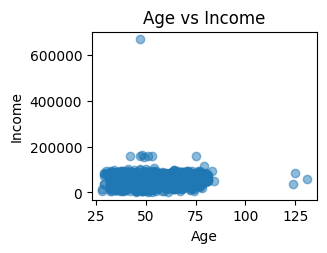

In [137]:
plt.subplot(2, 2, 1)
plt.scatter(data_encoded['Age'], data_encoded['Income'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

Text(0.5, 1.0, 'Age vs Frequency')

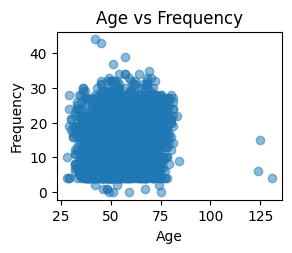

In [138]:
plt.subplot(2, 2, 2)
plt.scatter(data_encoded['Age'], data_encoded['Frequency'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs Frequency')

Text(0.5, 1.0, 'Income vs Frequency')

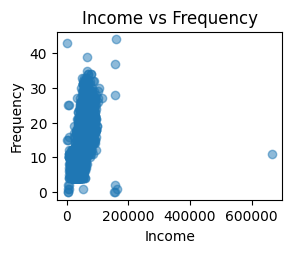

In [139]:
plt.subplot(2, 2, 3)
plt.scatter(data_encoded['Income'], data_encoded['Frequency'], alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income vs Frequency')

Text(0.5, 1.0, 'Frequency vs Monetary')

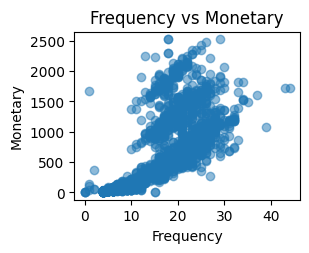

In [140]:
plt.subplot(2, 2, 4)
plt.scatter(data_encoded['Frequency'], data_encoded['Monetary'], alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

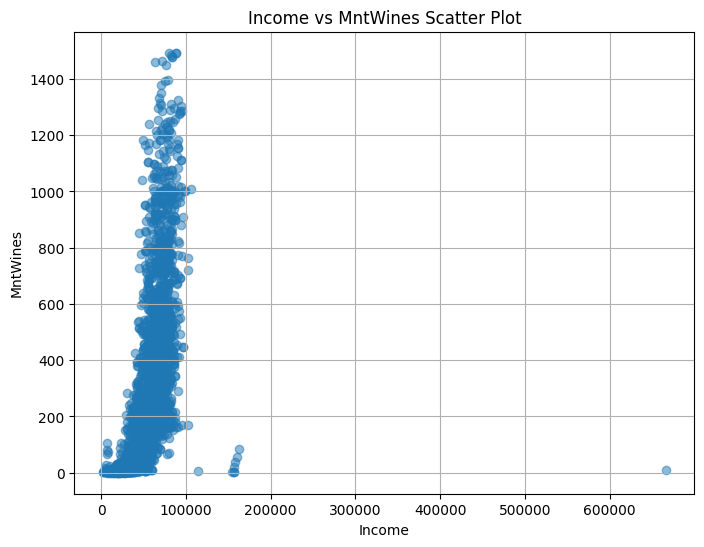

In [141]:
plt.figure(figsize=(8, 6))
plt.scatter(data_encoded['Income'], data_encoded['MntWines'], alpha=0.5)
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('Income vs MntWines Scatter Plot')
plt.grid(True)
plt.show()

ValueError: num must be 1 <= num <= 8, not 9

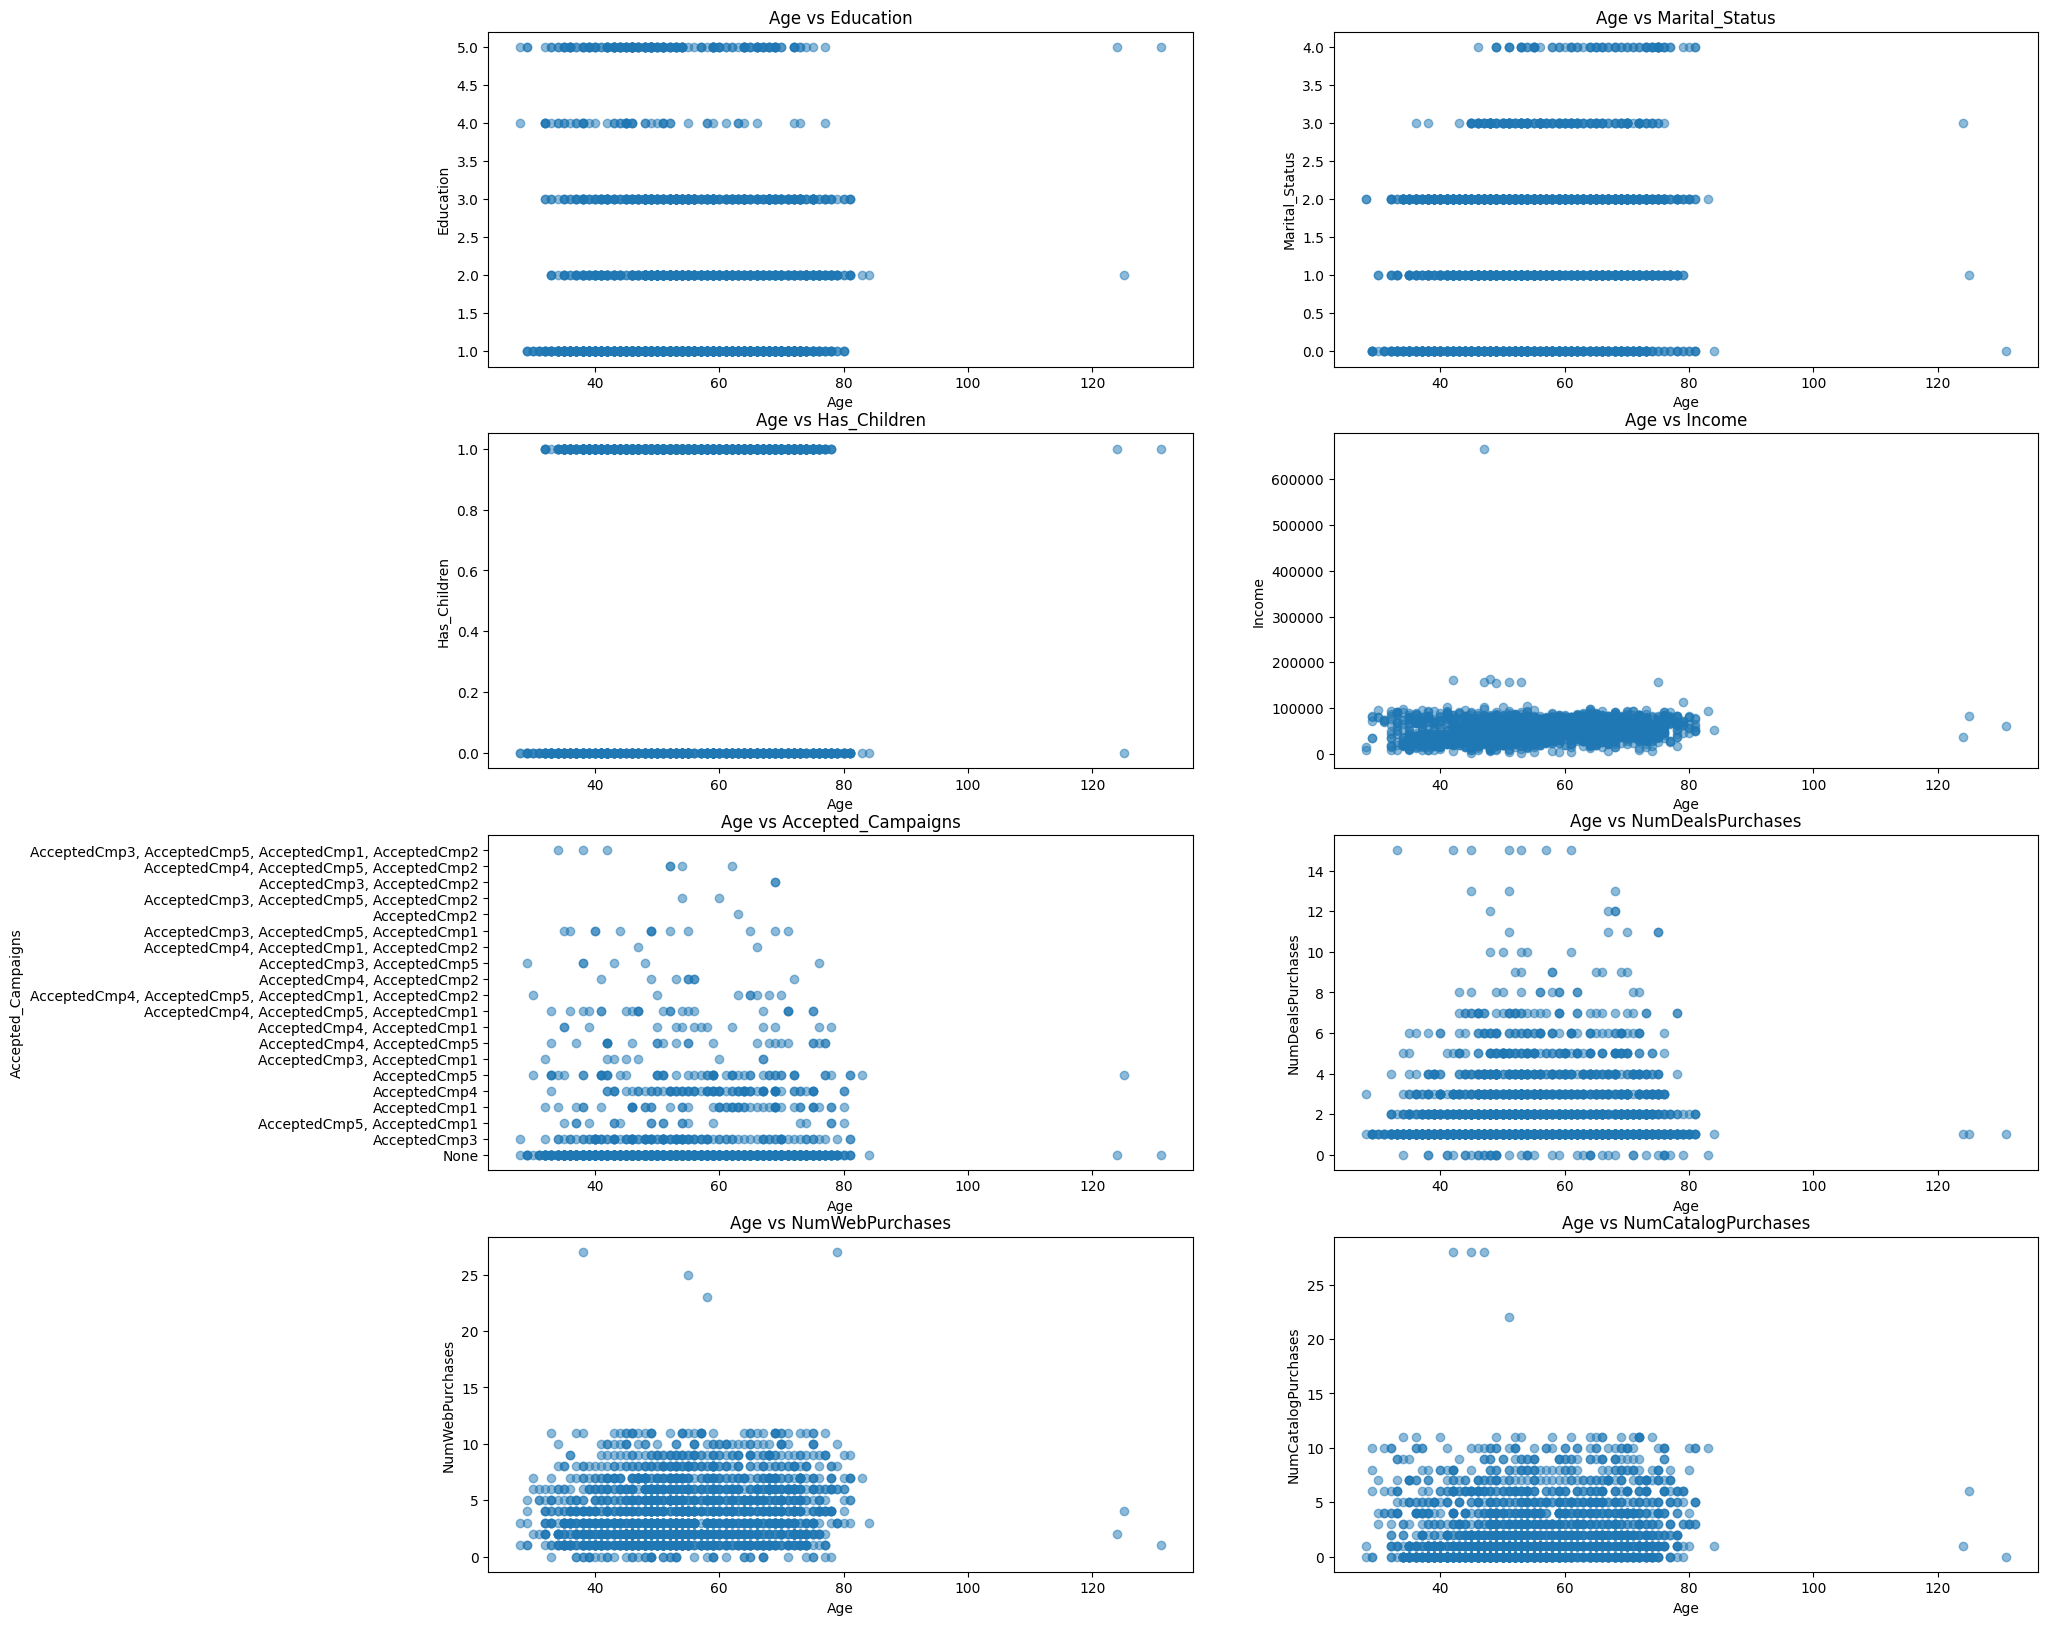

In [143]:
feature_pairs = list(itertools.combinations(data_encoded.columns, 2))

plt.figure(figsize=(20, 20))

plot_number = 1
for feature_x, feature_y in feature_pairs :
    plt.subplot(4, 2, plot_number)
    plt.scatter(data_encoded[feature_x], data_encoded[feature_y], alpha=0.5)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f'{feature_x} vs {feature_y}')
    plot_number += 1

plt.tight_layout()
plt.show()

## K-means

In [144]:
#'Age', 'Education', 'Marital_Status', 'Has_Children', 'Income',
#       'NumDealsPurchases', 'NumWebPurchases',
#       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
#       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
#       'MntSweetProducts', 'MntGoldProds', 'Recency', 

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

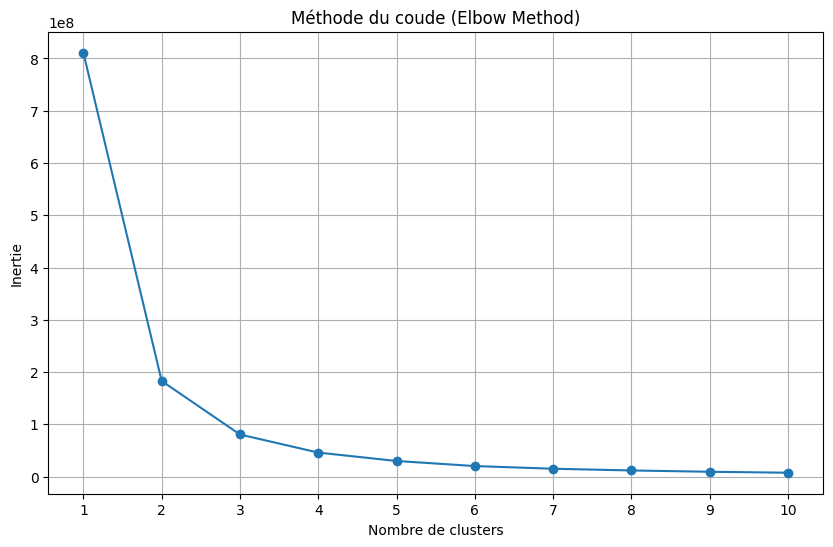

In [155]:
max_clusters = 10

# Initialiser une liste vide pour stocker les inerties
inertias = []

# Calculer l'inertie pour différents nombres de clusters
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertias, marker='o', linestyle='-')
plt.title('Méthode du coude (Elbow Method)')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [147]:
features = ['Frequency', 'Monetary']

# Sélectionner uniquement les colonnes nécessaires
X = data_encoded[features]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir les hyperparamètres à tester
param_grid = {'n_clusters': range(1, 11)}

# Initialiser le modèle KMeans
kmeans = KMeans(random_state=42)

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(kmeans, param_grid, cv=5, error_score='raise')

# Exécuter la recherche sur la grille
grid_search.fit(X_scaled)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés:", grid_search.best_params_)
print("Meilleur score de négative mean squared error:", grid_search.best_score_)

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Meilleurs paramètres trouvés: {'n_clusters': 10}
Meilleur score de négative mean squared error: -43.14710458985334


/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [148]:
k = 3

# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter les clusters à ton jeu de données
data_encoded['Cluster'] = clusters

# Analyser les clusters
cluster_means = data_encoded.groupby('Cluster').mean()

# Afficher les moyennes des caractéristiques pour chaque cluster
cluster_means

/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Age,Education,Marital_Status,Has_Children,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Receptif
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,57.548780,1.893293,1.451220,0.775915,58204.982927,3.246951,5.762195,3.064024,7.140244,5.105183,330.820122,29.452744,152.737805,41.051829,30.556402,56.626524,49.042683,19.213415,641.245427,2.512195,1.875000,2.120427,272.089939,1.608232,0.193598
1,52.885572,2.108458,1.398010,0.869652,35751.600708,1.887562,1.987065,0.516418,3.154229,6.355224,37.144279,4.871642,22.357214,7.087562,4.941294,14.961194,49.153234,7.545274,91.363184,2.504478,3.645771,3.550249,290.455721,1.512438,0.080597
2,56.608392,1.861888,1.365385,0.374126,74384.571601,2.020979,5.833916,5.970280,8.879371,3.732517,742.236014,60.337413,437.935315,86.646853,62.101399,80.162587,49.354895,22.704545,1469.419580,2.500000,1.487762,1.096154,265.973776,1.515734,0.442308


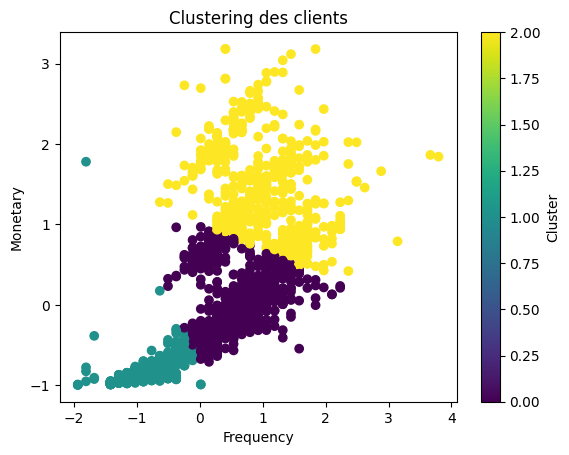

In [149]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Clustering des clients')
plt.colorbar(label='Cluster')
plt.show()

In [150]:
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# Appliquer K-means avec un nombre de clusters donné
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Obtenir les étiquettes de cluster pour chaque point
labels = kmeans.labels_

# Calculer le score de silhouette
silhouette_avg = silhouette_score(X, labels)
print("Le score de silhouette moyen est :", silhouette_avg)

Le score de silhouette moyen est : 0.8469881221532085


/home/louve/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [151]:
print(kmeans.inertia_)

171.91098459057724


## Gaussian Mixture

In [152]:
features = ['Frequency', 'Monetary']

# Sélectionner uniquement les colonnes nécessaires
X = data_encoded[features]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [153]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Calcul du score de silhouette
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.41435278509567336


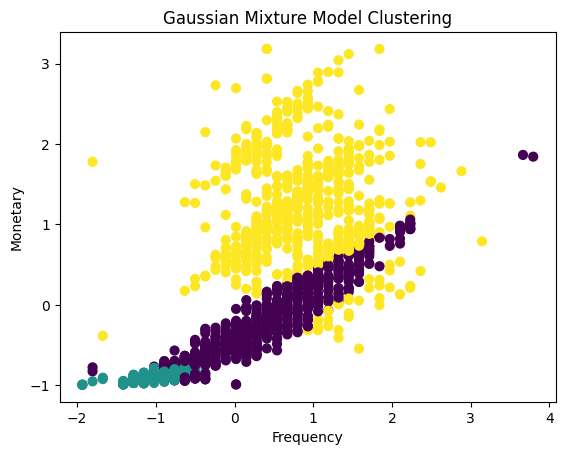

In [154]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=40, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()